# Homework 6 - Seasonal patterns in data

This week our emphasis will be on two things: Data checking and seasonal decomposition

Python needs numerical data to work with like other data programming languages. But sometimes Excel data or columns include "..", empty cells or "N/A"'s which are converted as string or object.

When you try to operate on such values, the whole system gives errors. There are remedies however
* 1. Check data type in the column, or values with **.dtype**
* 2. Convert to float with **.astype(float16)** if -needed!-

**Seasonal Decomposition**

For seasonal decomposition there are lots of libraries and you can just search "python seasonal decomposition". We will uses statsmodels library loaded at STEP 2

The decomposition needs to know the method and frequency. Method can be additive as
* data=trend+seasons+residual
or multiplicative as:
* data=trend\*seasons\*residual

Our function is :

***result = seasonal_decompose(crude, model='additive',freq=12)***

Then you can ask with **.trend** or **.seasonal** or **plot(result.trend)**

If you further limit the data to last 2 months, you can use 
* result.trend[-12:]


In [ ]:
# 1. load standard libraries

# more info https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# 2. load libraries for seasonal decompose from Statsmodels package
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 3 Load the data
wb_pinksheet="http://pubdocs.worldbank.org/en/561011486076393416/CMO-Historical-Data-Monthly.xlsx"
prices=pd.read_excel(wb_pinksheet,sheet_name="Monthly Prices", skiprows=6,index_col=0)

In [ ]:
# 4 Always check the data
prices.tail(2)

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,RAPESEED_OIL,SUNFLOWER_OIL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,...,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER,COAL_COL,COPRA,iSTL_JP_INDX,STL_JP_CROLL,STL_JP_HROLL,STL_JP_REBAR,STL_JP_WIROD,COTTON_MEMPH,RUBBER1_US,WHEAT_CANADI,WOODPULP
2020M08,43.443333,44.26,43.71,42.36,50.14,57.38,2.2933,2.861897,6.34303,45.751142,2.34868,3.599042,1.602318,3.155081,3.377145,4.085598,2.0025,981.30,1297.14,1479.92,1876.96,760.30,739.17,384.552363,866.94,374.95,921.55,860,80.376771,149.342508,189.487089,505.0,486,480.85,448.91,208.939,198.415818,0.895318,1.250433,0.616571,...,..,12.566334,0.386255,0.603845,0.288805,4545.810169,413.98,280.839116,629.127,719.5240,514.998,1.541911,1.3214,1.7032,76.88,341.88,276.25,249.5,202.5,1737.26,121.07,6498.94,1935.73,17650.03,14537.75,2410.05,1968.63,940.33,27.003,..,..,..,..,..,..,..,..,..,..,..
2020M09,40.596667,41.09,41.10,39.6,54.6,57.47,1.9186,3.952139,6.34303,46.384004,2.45790,3.672015,1.604302,3.101105,3.398976,3.856840,2.0475,1031.54,1682.5,1477.77,1880.59,798.12,767.14,423.690000,906.09,406.14,941.2,890,80.376771,166.140834,189.487089,507.0,488,483,462.66,219.683,198.415818,0.910141,1.240099,0.605145,...,..,11.856446,0.385145,0.591940,0.281310,4521.487167,412.79,282.123580,621.892,712.5471,517.291,1.561091,1.3705,1.8576,79.38,358.38,282.50,250.5,202.5,1743.77,123.75,6704.90,1872.91,17951.26,14857.49,2442.46,1921.92,907.62,25.742,..,..,..,..,..,..,..,..,..,..,..


In [ ]:
# 5. Check the data type
# if your data is not float/integer/double, Python will give errors
prices.CRUDE_BRENT[-150:].dtype

dtype('O')

In [ ]:
# 6. Convert your data type if needed
# if data type is not float or any number convert it to float with .astype(float16)
prices.CRUDE_BRENT[-150:].astype(float16).dtype

dtype('float16')

In [ ]:
crude=prices.CRUDE_BRENT[-150:].astype(np.float16)

In [ ]:
# 7. Decompose your data to seasonal components

# now you can decompose your data into trend, seasonal and residual parts
#result = seasonal_decompose(prices.CRUDE_BRENT[-150:], model='multiplicative', period=12)
result = seasonal_decompose(crude, model='additive',freq=12)

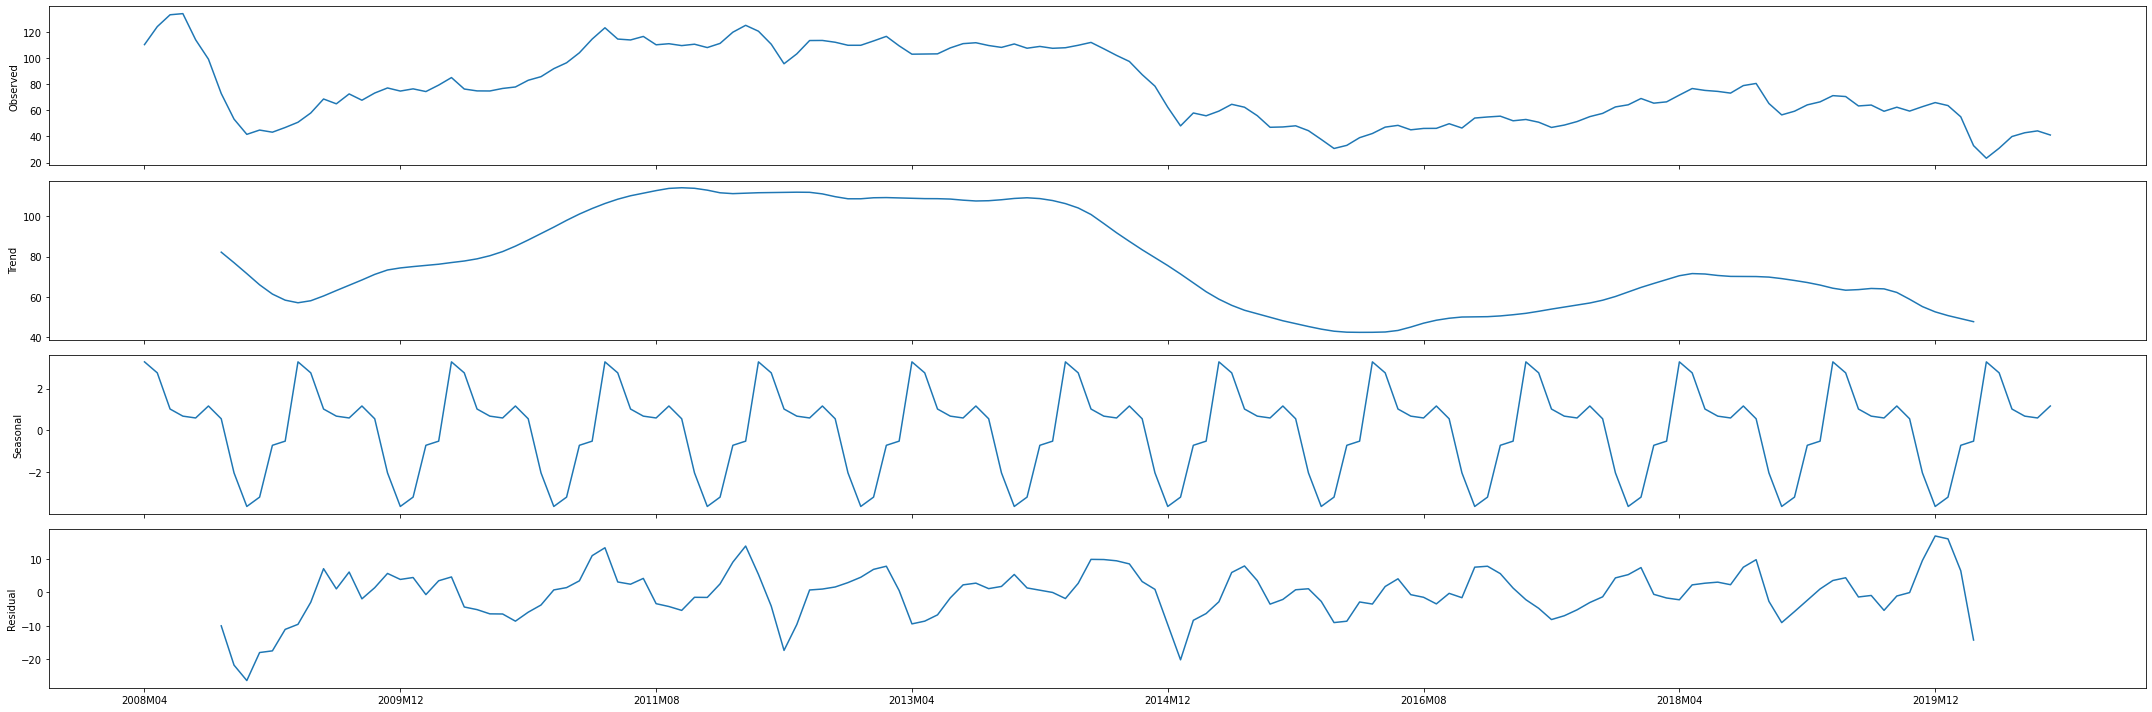

In [ ]:
# 8. Plot the results and observe
result.plot();

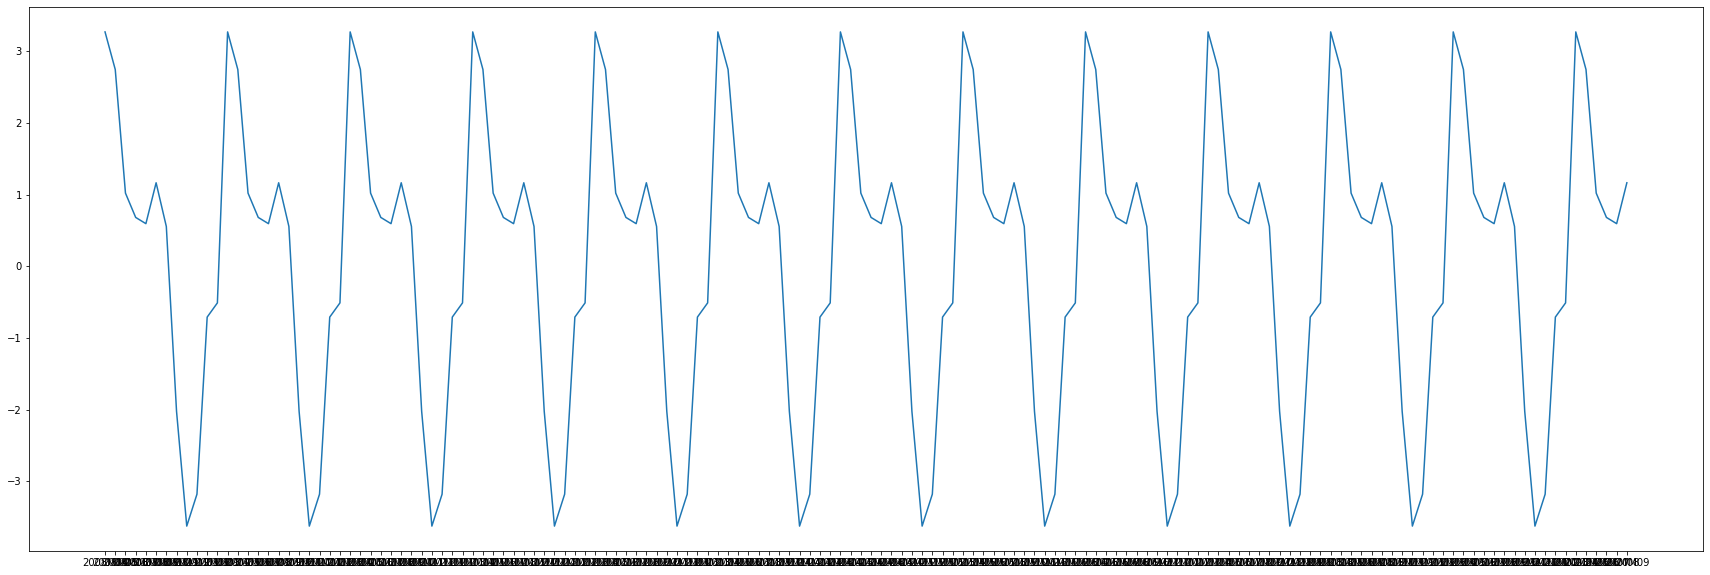

In [ ]:
# 8.1 Plot seasonal component
plot(result.seasonal)

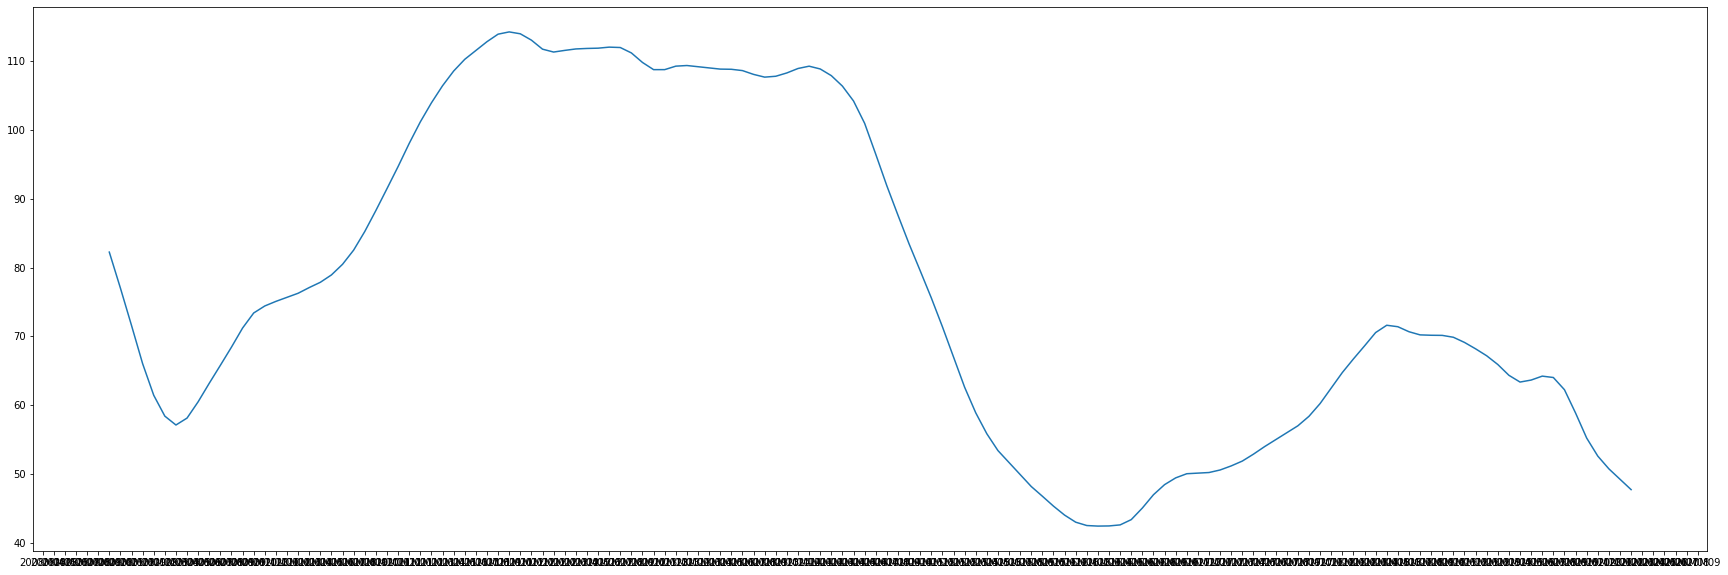

In [ ]:
# 8.2 Plot the trend component
plot(result.trend)

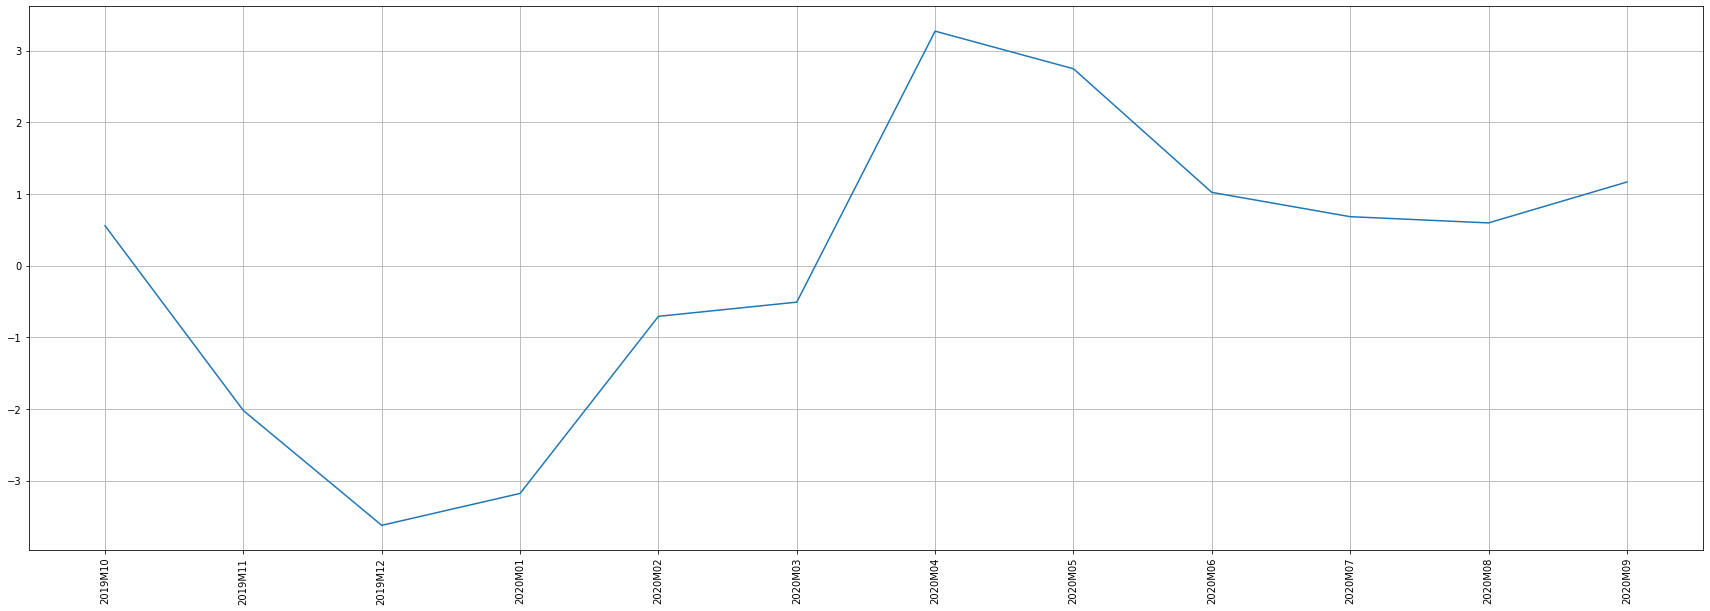

In [ ]:
# 9. Plot a more professional chart
# Plot the seasonal component for 12 months with a grid, x-axis ticks and figure size)
#or you can just do :
# plot(result.seasonal[-12:])
xticks(rotation=90);
grid("on")
plot(result.seasonal[-12:], figure=figsize(30,10))

In [ ]:
# now lets do everything with gas prices
# see the inline ".astype(float16)" to convert data to float 
result_eur = seasonal_decompose(prices.NGAS_EUR[-100:].astype(float16), model='additive', freq=12)
result_jp = seasonal_decompose(prices.NGAS_JP[-100:].astype(float16), model='additive', freq=12)
result_us = seasonal_decompose(prices.NGAS_US[-100:].astype(float16), model='additive', freq=12)

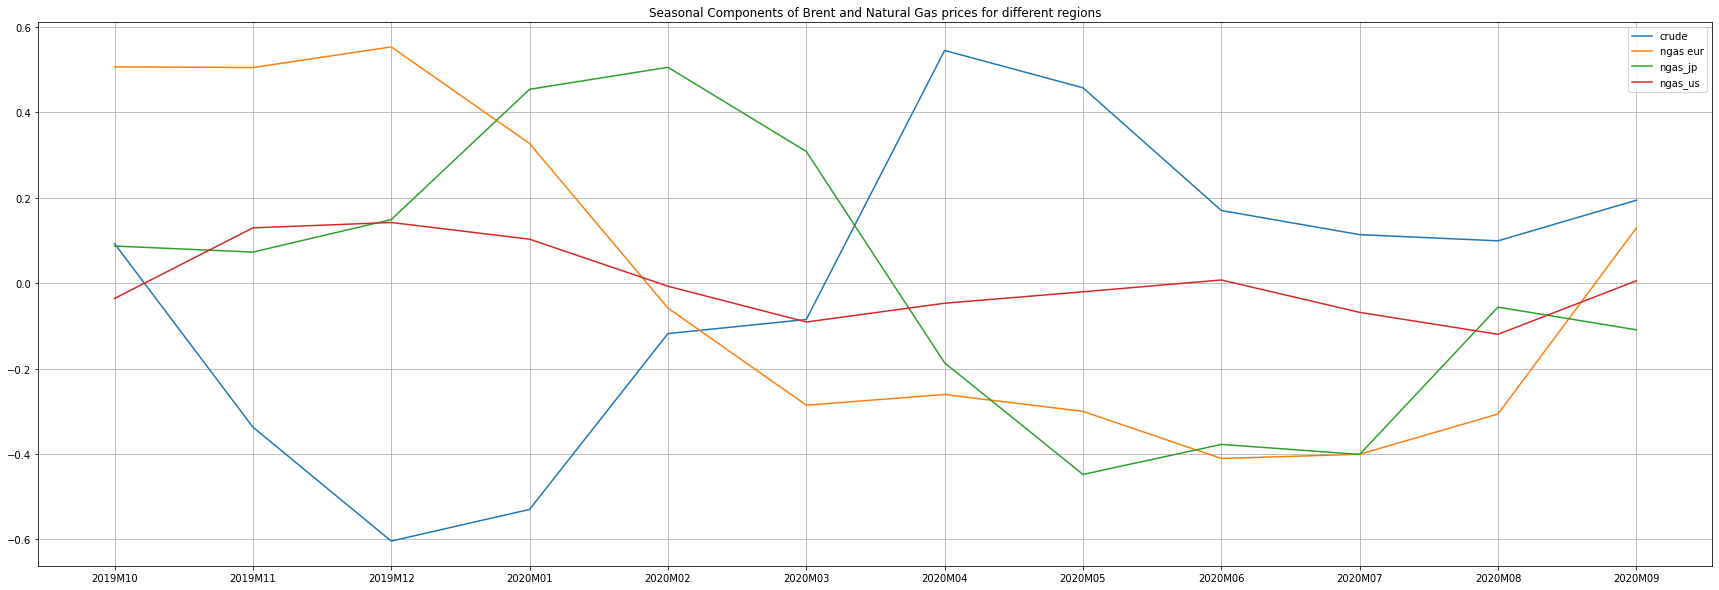

In [ ]:
# 10. Plot seasonal components of crude oil, European, Japanese and US natural gas price
# Since crude price is much larger we divide it by 6(a random number to match scale)
plot(result.seasonal[-12:]/6,label="crude")
plot(result_eur.seasonal[-12:],label="ngas eur")
plot(result_jp.seasonal[-12:], label="ngas_jp")
plot(result_us.seasonal[-12:],label="ngas_us")
legend(loc="upper right")  # put the labels on upper right
title("Seasonal Components of Brent and Natural Gas prices for different regions")
grid("on")

# This is not mandatory ---------- Bonus part -------
# Simple Forecasting with Exponential Smoothing

In [ ]:
#https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051

from statsmodels.tsa.holtwinters import ExponentialSmoothing
#train=prices.NGAS_EUR[-100:]
train=prices.CRUDE_BRENT[-150:].astype(np.float16)

model = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12)
#model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(24)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


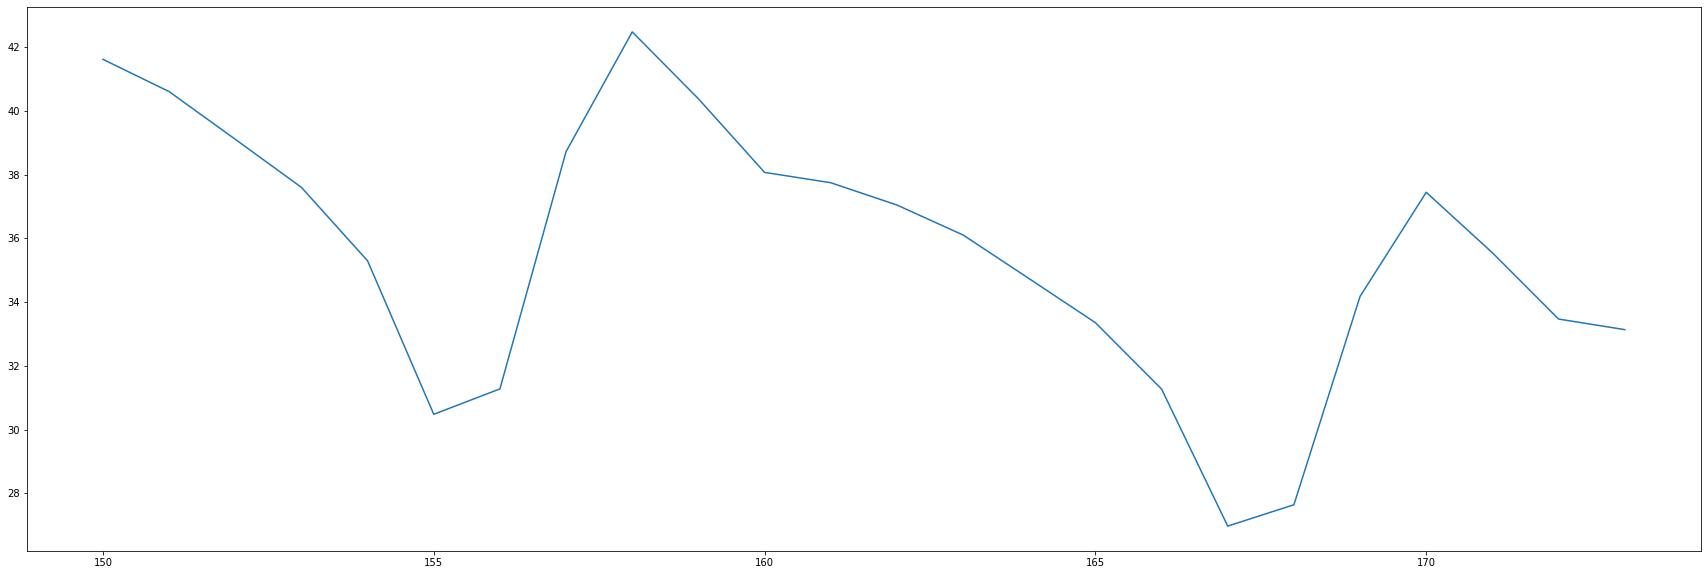

In [ ]:
plot(pred)

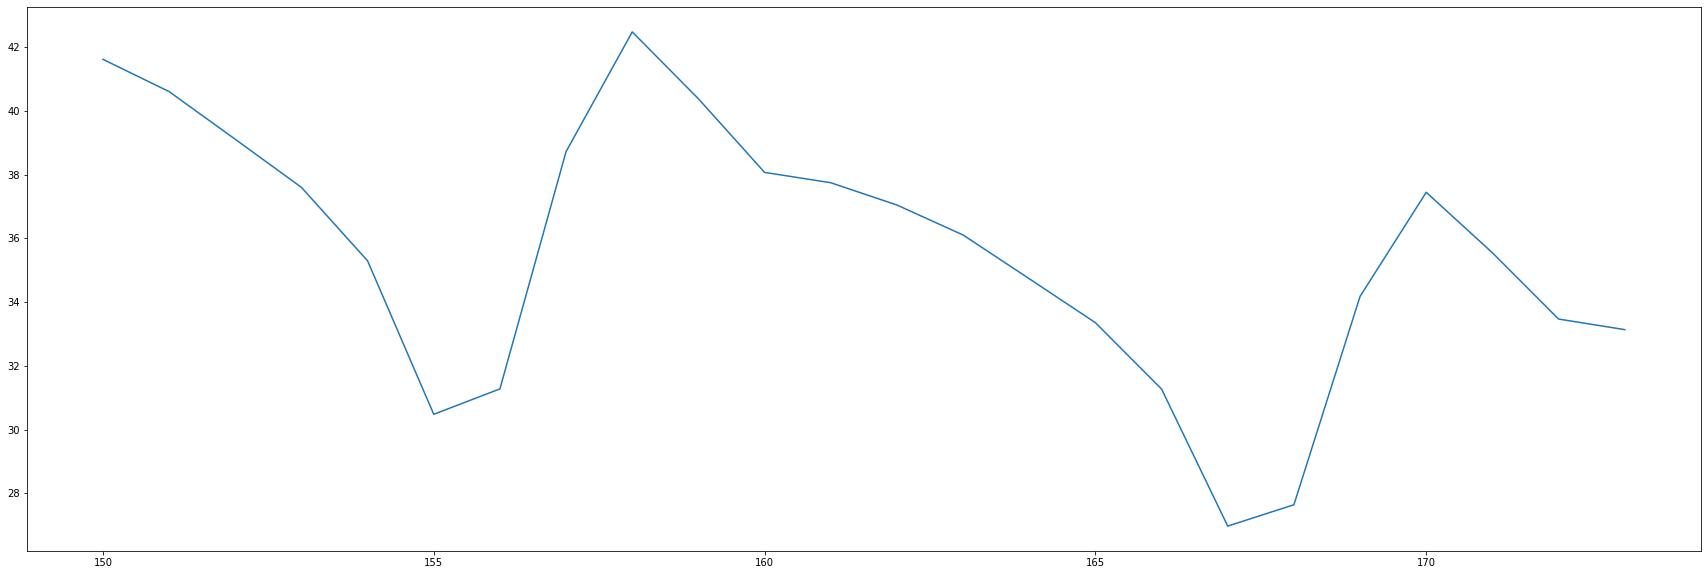

In [ ]:
pred.plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarima_model = SARIMAX(train, order=(0, 1, 2), seasonal_order=(0, 1, 2, 12), enforce_invertibility=False, enforce_stationarity=False)
sarima_fit = sarima_model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


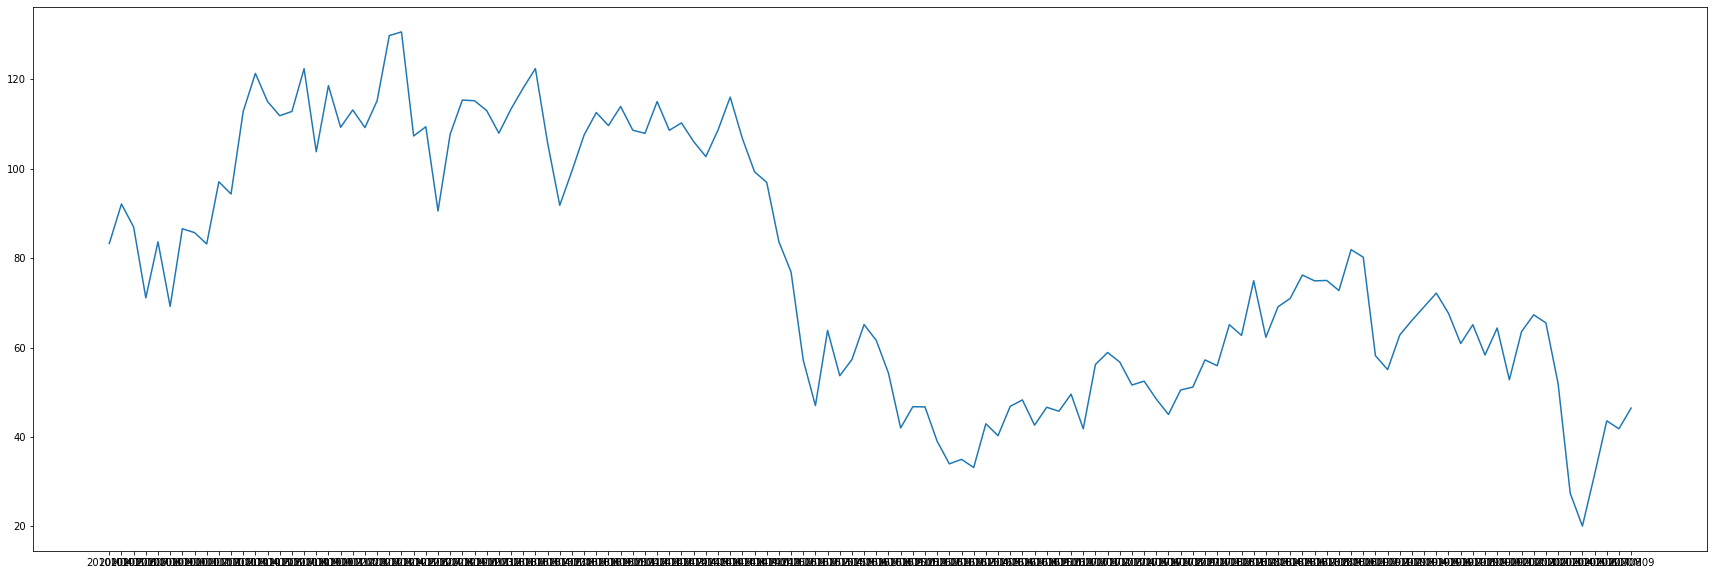

In [ ]:
plot(sarima_fit.predict(24))